# Прогнозирование оттока клиентов

__КОНТЕКСТ ПРОЕКТА:__  
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.   

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.  

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов. 

__ЦЕЛЬ ИССЛЕДОВАНИЯ:__  
Провести анализ и подготовить план действий по удержанию клиентов.  

__ЗАДАЧИ ИССЛЕДОВАНИЯ:__  
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1) выделить целевые группы клиентов;
    2) предложить меры по снижению оттока;
    3) определить другие особенности взаимодействия с клиентами.

__ИСХОДНФЕ ДАННЫЕ:__   
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:  



(1) Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:


- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `Churn` — факт оттока в текущем месяце.

__ПЛАН РАБОТЫ__
1. Загрузить и проверить данные.
2. Провести EDA, визуализировать распределение признаков.
3. Составить матрицу корреляций признаков.
4. Посмтроить модель прогнозирования оттока клиентов.
5. Провести кластеризацию клиентов.
6. Написать выводы и дать базовые рекомендации.

## Импорт и настройка библиотек

In [1]:
# импорт и настройка библиотек
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 15})
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', -1)
pd.set_option('display.precision',2)

print('Библиотеки успешно импортированы и настроены.')

Библиотеки успешно импортированы и настроены.


## Загрузка данных

Для загрузки и первичного знакомства с данными создадим функции.

In [2]:
# создание функции
def def_info(df, rc=1, d=1, i=1, c=1, s=1):
    
    # описание функции и фрагмент для вывода: print(def_info.__doc__)
    """
    Эта функция выводит информацию о датафрейме:
    - количество строк и столбцов (в том числе пустых)
    - информация о дубликатах
    - сводная информация (аналог info)
    - названия столбцов
    - пример(ы) строк(и) датафрейма (можно указать количество)
    
    Принимает на вход:
    - `df` - датафрейм
    - `rc` - определяет вывод информации о количестве строк и столбцов (1 или 0)
    - `d` - определяет вывод информации о дубликатах (1 или 0)
    - `i` - определяет вывод сводной информации (1 или 0)
    - `c` - определяет вывод информации о названиях столбцов (1 или 0)
    - `s` - определяет вывод примера строки (значения больше 0 выводят указанное количество строк)
    
    Если указать только датафрейм, будет выведено всё.

    """
    
# получение и вывод информации о количестве строк и столбцов
    if rc == 1:
        empty_rows = (df.isna().all(axis=1)).sum()
        empty_rows_per = (df.isna().all(axis=1)).mean()
        empty_cols = (df.isna().all(axis=0)).sum()
        empty_cols_per = (df.isna().all(axis=0)).mean()
        print(f"- количество строк: {df.shape[0]}, \
              полностью пустых - {empty_rows} ({empty_rows_per:.0%})")
        print(f"- количество столбцов: {df.shape[1]}, \
              полностью пустых - {empty_cols} ({empty_cols_per:.0%})")
    
# создание таблицы для вывода сводной информации (аналог info(),
# но с указанием количества и доли пропусков для каждого столбца)    
    if i == 1:
        data_info = df.notnull().sum().to_frame(name='данные')
        data_info['пропуски'] = df.isnull().sum()
        data_info['% пропусков'] = round((df.isnull().sum() / len(df)), 2)
        data_info['тип данных'] = df.dtypes

# вывод таблицы с цветовой индикацией количества данных и пропусков
        display(data_info.style
            .format({'% пропусков': '{:.0%}'})
            .set_caption('сводная информация')
            .bar(subset=['данные'], color='lightgreen')
            .applymap(lambda x: 'background-color: peachpuff' if x > 0 else '' if x == 0 else '',
                      subset=['пропуски'])
            .bar(subset=['% пропусков'], color='coral')
            .set_table_styles([{'selector': 'caption', 
                                'props': [('color', 'coral'), ('font-size', '14px')]
                               }])
           )

# получение и вывод информации о количестве полных дубликатов
    if d == 1:
        duplicates = df.duplicated()
        num_duplicates = duplicates.sum()
        if num_duplicates == 0:
            print('Полных дубликатов нет')
        else:
            print('\033[1m\033[38;5;209m\nдубликаты\033[0m')    
            print('Количество полных дубликатов:', num_duplicates)
            
# вывод названий столбцов
    if c == 1:
        print('\033[1m\033[38;5;209m\nстолбцы\033[0m')
        print(df.columns.tolist())
        
# вывод нескольких строк для примера (можно указать количество)
    if s > 0:
        print('\033[1m\033[38;5;209m\nпример строк(и)\033[0m')
        display(df.sample(s))

In [3]:
# создание функции
def def_load_data(df_name, file_name, file_type, path=None, name=None, sep=None, sheet_name=0, header=0):

    # описание функции и фрагмент для вывода: print(def_load_data.__doc__)
    """
    Эта функция загружает данные из файла (csv или excel) и преобразует их в датафрейм для работы.
    Затем выводит основную информацию по файлу с помощью функции def_info
    Принимает на вход:
    - `df_name` - название создаваемого датафрейма
    - `file_name` - название загружаемого файла
    - `file_type` - тип загружаемого файла
    - `path` - путь к файлу (если файл находится в другой директории)
    - `name` - название таблицы для читателя, поясняющее содержимое файла
    - `sep` - разделитель для csv файла
    - `sheet_name` - имя листа в excel файле
    - `header` - номер строки, которую нужно использовать в качестве заголовка таблицы
    Обязательными являются только первые 3 параметра, остальные используются при необходимости.

    """
    
    # вывод информации об источнике
    print(
        '\033[1m\033[38;5;209mИСТОЧНИК\n{} - {}\033[0m'.format(file_name, name))
    
    # загрузка из источника определённого типа в датафрейм       
    if file_type == 'xls' or file_type == 'xlsx':
        try:
            df = pd.read_excel(path, sheet_name=sheet_name, header=header)
        except:
            df = pd.read_excel(file_name, sheet_name=sheet_name, header=header)
    elif file_type == 'csv':
        try:
            df = pd.read_csv(path, sep=sep)
        except:
            df = pd.read_csv(file_name, sep=sep)
    else:
        print('Тип файла не распознан')
        return
    globals()[df_name] = df
        
    # вывод информации о созданном датафрейме с помощью функции
    def_info(df, i=1, s=1, d=1, c=1)

Теперь загрузим данные.

In [4]:
# загрузка данных с помощью функции
def_load_data('df_gym', 'gym_churn.csv', 'csv',
              path='/datasets/gym_churn.csv',
              name='данные о клиентах')

ИСТОЧНИК
gym_churn.csv - данные о клиентах
- количество строк: 4000,               полностью пустых - 0 (0%)
- количество столбцов: 14,               полностью пустых - 0 (0%)


,данные,пропуски,% пропусков,тип данных
gender,4000,0,0%,int64
Near_Location,4000,0,0%,int64
Partner,4000,0,0%,int64
Promo_friends,4000,0,0%,int64
Phone,4000,0,0%,int64
Contract_period,4000,0,0%,int64
Group_visits,4000,0,0%,int64
Age,4000,0,0%,int64
Avg_additional_charges_total,4000,0,0%,float64
Month_to_end_contract,4000,0,0%,float64


Полных дубликатов нет

столбцы
['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']

пример строк(и)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
192,1,1,1,0,1,12,0,30,174.43,11.0,9,1.7,1.6,0


На первый взгляд очень хороший датасет (нет пропусков, дубликатов, типы данных соотвествуют заявленным).  
Далее изучим подробнее все поля, а пока приведём их названия к "хорошему стилю".

In [5]:
# приведение названий столбцов к нижнему регистру
df_gym.columns = df_gym.columns.str.lower()

# проверка
df_gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

<div style="border:solid green 2px; padding: 20px">    
Данные успешно загружены, проведена небольшая стилистическая предобработка.
<br>Пропусков и явных дубликатов нет. Датасет содержит 4000 записей (строк). И 13 признаков (столбцов).
</div>

## Исследовательский анализ данных (EDA)

### Средние значения и стандартные отклонения

С помощью describe() изучим, как распределяются средние значения и стандартные отклонения

In [6]:
# вывод информации
df_gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.0,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.0,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,4000.0,146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00


Можно сделать следующие наблюдения:  
- `genre` (пол): женщин и мужчин примерно поровну;
- `near_location` (проживание рядом): в основном клиенты проживают рядом;
- `partner` (сотрудник компании): примерно половина клиентов из компаний-партнёров;
- `promo_friends` (промокод от друга): 31% - это клиенты, пришедшие по промокоду от друга;
- `phone` (телефон): у 90% указан телефон;
- `contract_period` (длительность абонемента): в среднем 4.68 месяца, меньше полугода;
- `group_visits` (групповые занятия): 41% клиентов посещает групповые занятия;
- `age` (возраст): 29 лет в среднем;
- `avg_additional_charges_total` (суммарная выручка от других услуг): 147 рублей в среднем;
- `month_to_end_contract` (срок до окончания текущего обонемента): до окончания абонемента 4.32 месяца в среднем;
- `lifetime` (время с первого обращения): 3.72 месяца;
- `avg_class_frequency_total` (среднее посещение всего): 1.88 посещения в месяц в течении года (как-то очень мало - меньше 2 почещений в месяц)
- `avg_class_frequency_current_month` (среднее посещение в месяц): 1.77 среднее посещение в посл месяц;
- `churn` (факт оттока в текущем месяце): 27% перешли в группу отток клиентов (больше четверти клиентов)

### Средние значения признаков по группам

Теперь посмотрим на средние значения в каждой группе.

In [7]:
# группировка данным по параметру оттока и определение средних значений для всех остальных параметров
df_gym.groupby('churn').mean().T.style.format('{:.2f}')

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


В сравнении двух групп можно сделать следующие наблюдения:  
- `genre` (пол): в обеих группах женщин и мужчин примерно поровну;
- `near_location` (проживание рядом): в группе оттока больше живуших дальше;
- `partner` (сотрудник компании): в группе оттока меньше клиентов из компаний-партнёров;
- `promo_friends` (промокод от друга): в группе оттока таких немного - всего 18% (против 35% в группе оставшихся);
- `phone` (телефон): 90% в обеих группах;
- `contract_period` (длительность абонемента): в группе оттока более короткий период (меньше 2 месяцев);
- `group_visits` (групповые занятия): в группе оттока меньше посещают групповые занятия;
- `age` (возраст): в группе оттока возрат немного ниже (27 лет против 30 лет у остающихся);
- `avg_additional_charges_total` (суммарная выручка от других услуг): выручка в группе оттока немного меньше: 115 у.е. против 158 у.е.;
- `month_to_end_contract` (срок до окончания текущего обонемента): также меньше в группе оттока;
- `lifetime` (время с первого обращения): меньше месяца (против почти 4.7 месяцев у оставшихся);
- `avg_class_frequency_total` (среднее посещение всего): менее 1.5 раз (у оставшихся чуть более 2 раз);
- `avg_class_frequency_current_month` (среднее посещение в месяц): чуть больше 1 раза против немногим более 2 раз у оставшихся;

### Визуализация распределений признаков по группам

Для удобства создадим функцию, которая построит общий график для двух групп по заданному параметру.

In [8]:
# создание функции
def def_plot(plot, df, column, hue, title, x_title, legend_labels=None, **kwargs):
    
    # описание функции
    """
    Эта функция создаёт нужный тип графика для определённого столбца датафрейма.
    
    Принимает на вход:
    - plot - тип графика
    - df - датафрейм
    - column - название столбца
    - hue - название столбца для группировки
    - title - заголовок графика
    - x_title - подпись оси x
    - legend_labels - легенда
    - **kwargs - дополнительные аргументы для настройки графика
    
    """
    
    # построение и вывод графика    
    plt.figure(figsize=(20, 6))
    plot(data=df, x=column, hue=hue, palette='tab10', **kwargs)
    plt.title(title, color='red', fontsize=20)
    
    if legend_labels:
        plt.legend(legend_labels, fontsize=14)
    
    plt.xlabel(x_title) 
    plt.ylabel('количество клиентов') 
    plt.show()

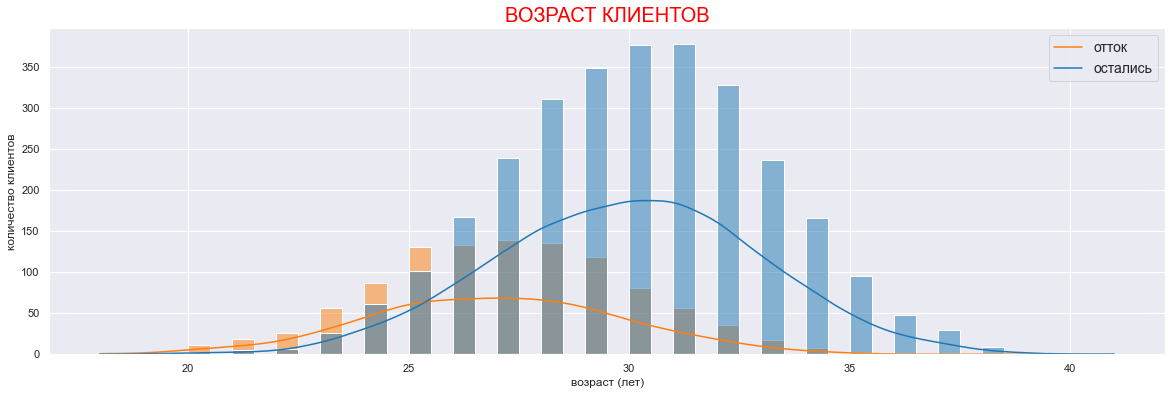

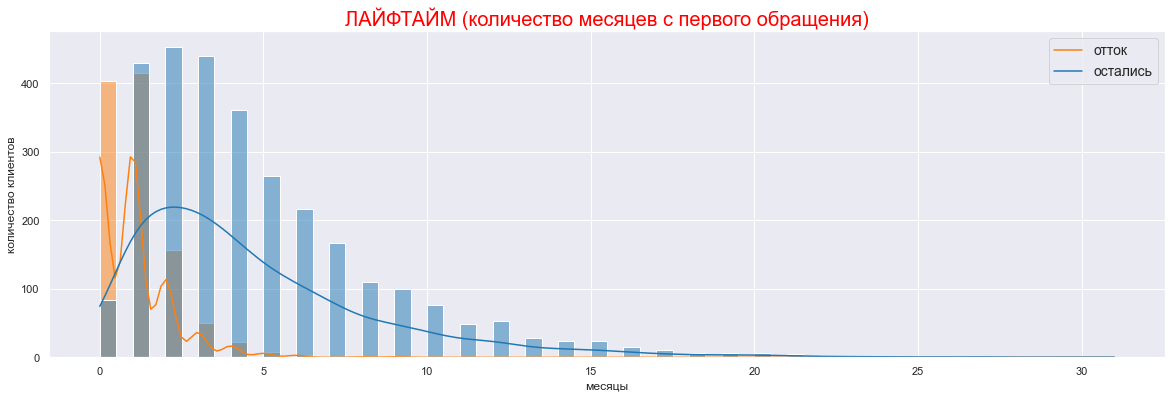

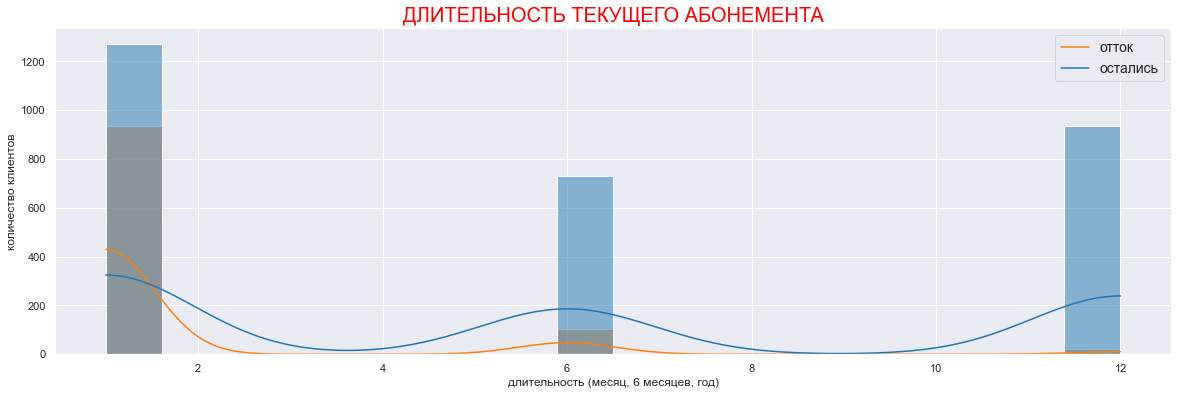

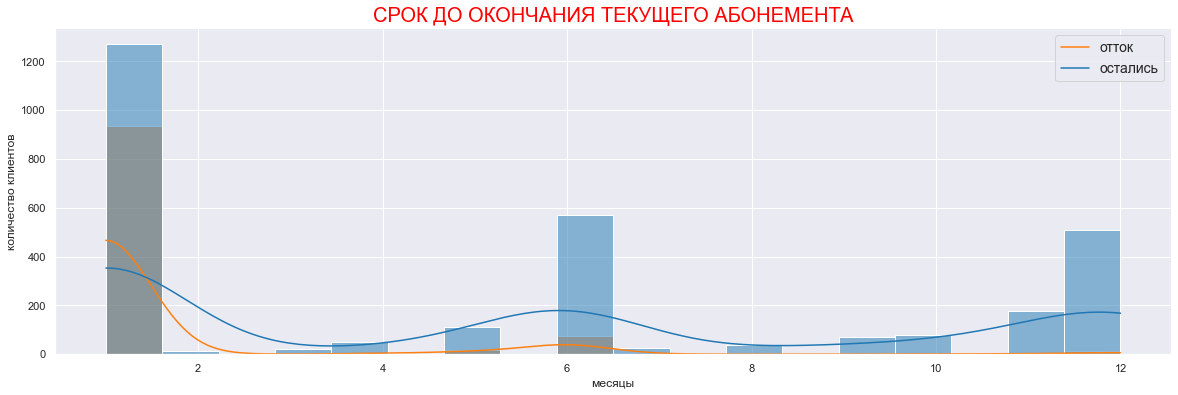

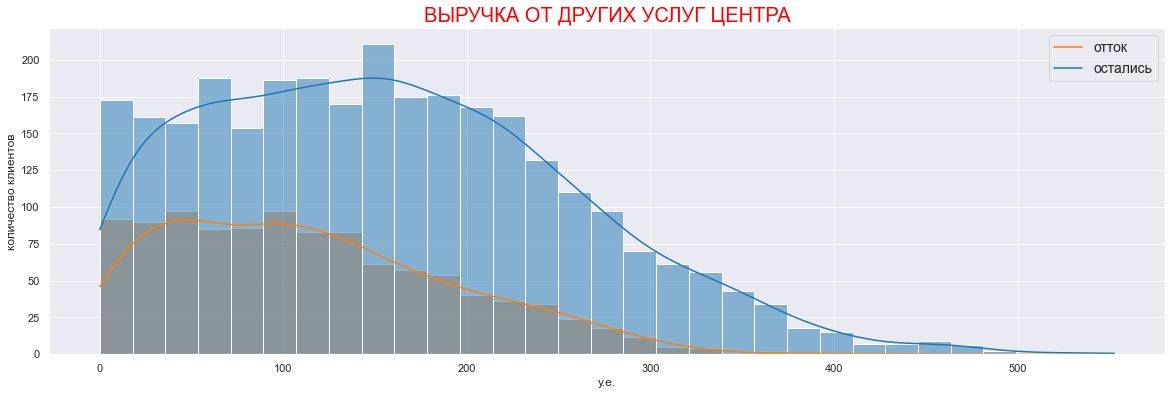

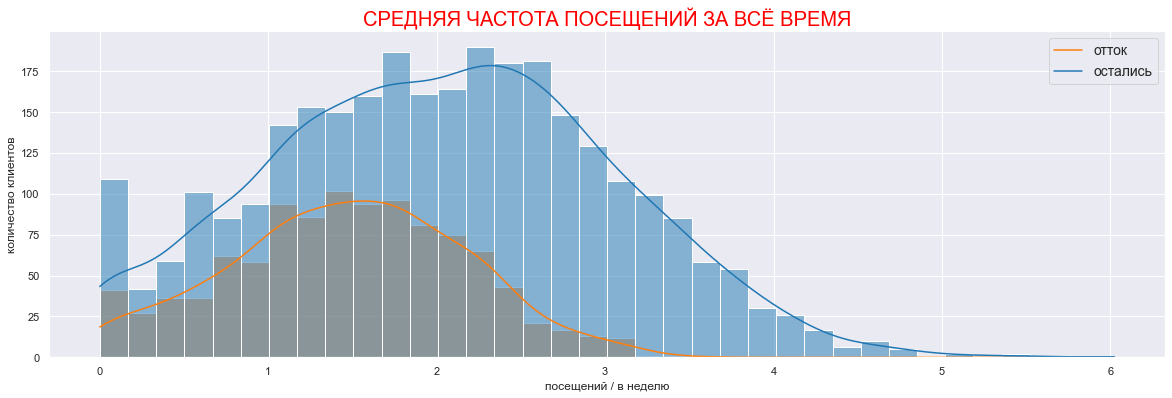

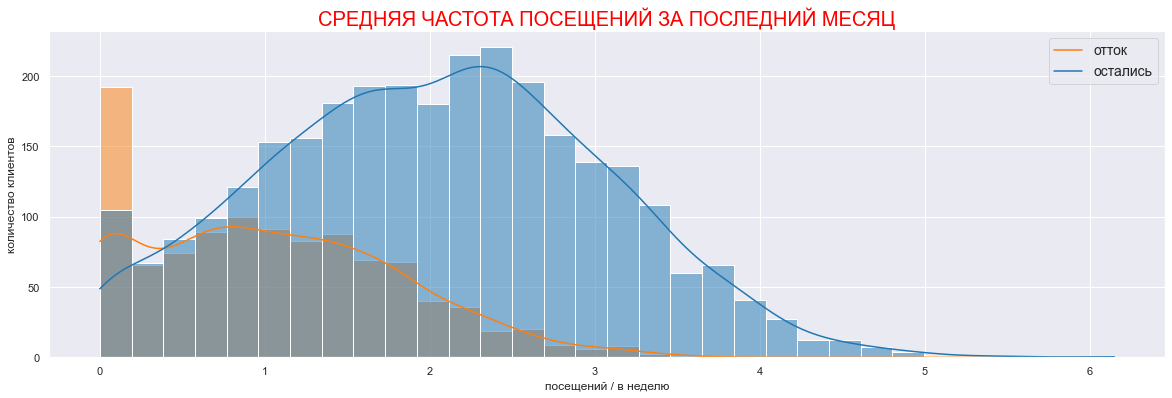

In [9]:
# вывод графиков с помощью функции
def_plot(sns.histplot, df_gym, 'age', 'churn',
         'ВОЗРАСТ КЛИЕНТОВ',
         'возраст (лет)', legend_labels=['отток', 'остались'], kde=True)

def_plot(sns.histplot, df_gym, 'lifetime', 'churn',
         'ЛАЙФТАЙМ (количество месяцев с первого обращения)',
         'месяцы', legend_labels=['отток', 'остались'], kde=True)

def_plot(sns.histplot, df_gym, 'contract_period', 'churn',
         'ДЛИТЕЛЬНОСТЬ ТЕКУЩЕГО АБОНЕМЕНТА',
         'длительность (месяц, 6 месяцев, год)',legend_labels=['отток', 'остались'], kde=True)

def_plot(sns.histplot, df_gym, 'month_to_end_contract', 'churn',
         'СРОК ДО ОКОНЧАНИЯ ТЕКУЩЕГО АБОНЕМЕНТА',
         'месяцы', legend_labels=['отток', 'остались'], kde=True)

def_plot(sns.histplot, df_gym, 'avg_additional_charges_total', 'churn',
         'ВЫРУЧКА ОТ ДРУГИХ УСЛУГ ЦЕНТРА',
         'у.е.', legend_labels=['отток', 'остались'], kde=True)

def_plot(sns.histplot, df_gym, 'avg_class_frequency_total', 'churn',
         'СРЕДНЯЯ ЧАСТОТА ПОСЕЩЕНИЙ ЗА ВСЁ ВРЕМЯ',
         'посещений / в неделю', legend_labels=['отток', 'остались'], kde=True)

def_plot(sns.histplot, df_gym, 'avg_class_frequency_current_month', 'churn',
         'СРЕДНЯЯ ЧАСТОТА ПОСЕЩЕНИЙ ЗА ПОСЛЕДНИЙ МЕСЯЦ',
         'посещений / в неделю', legend_labels=['отток', 'остались'], kde=True)

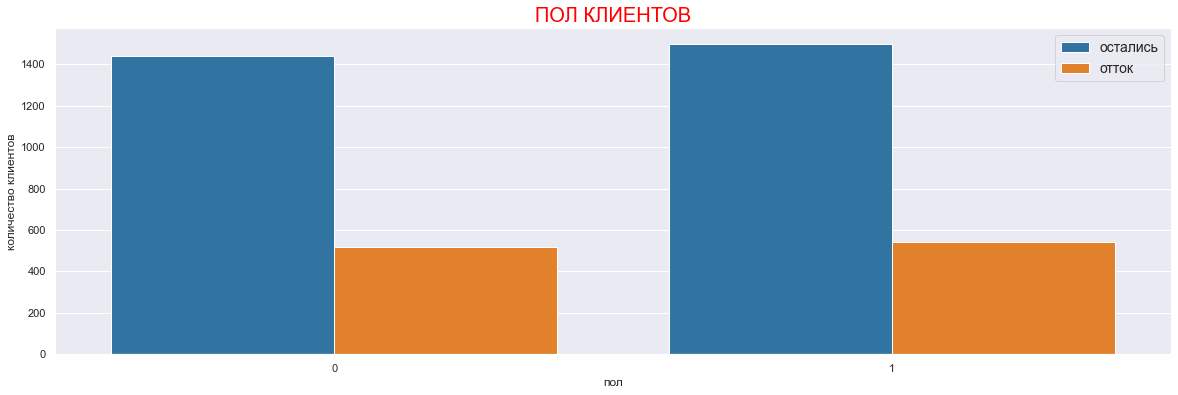

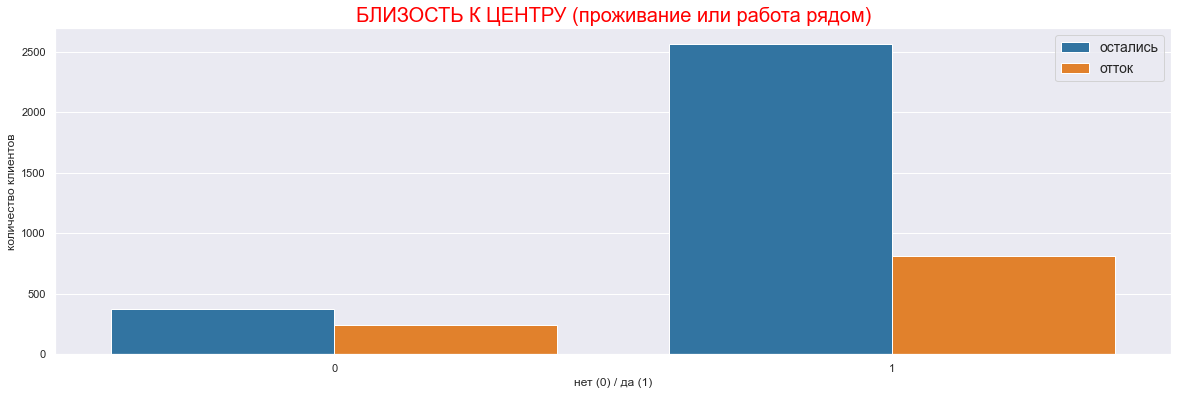

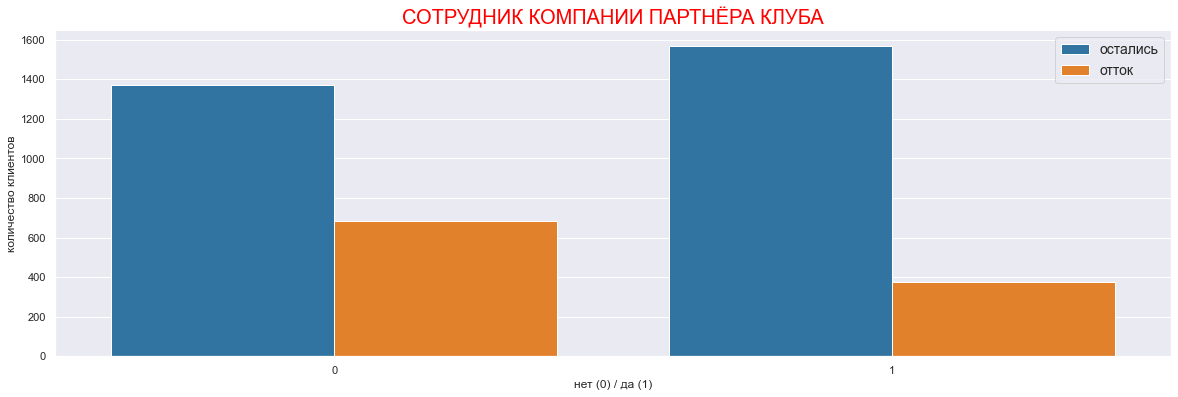

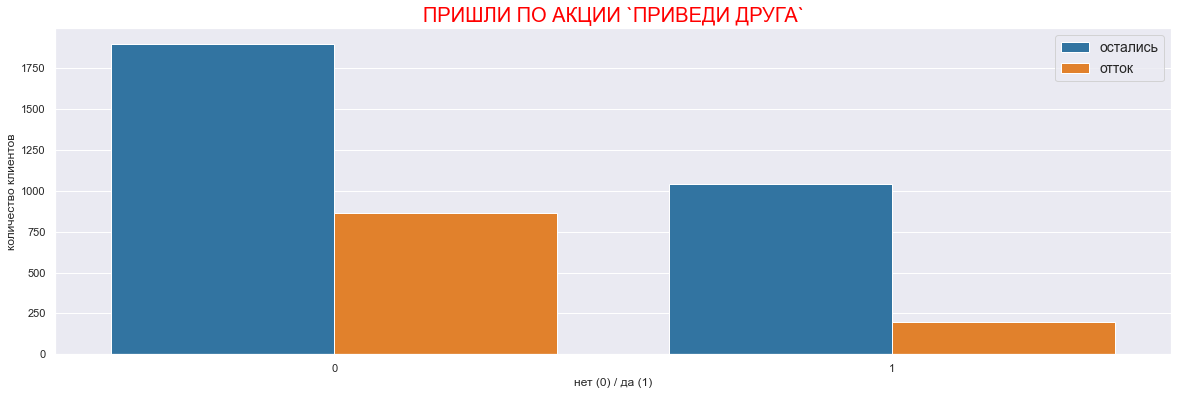

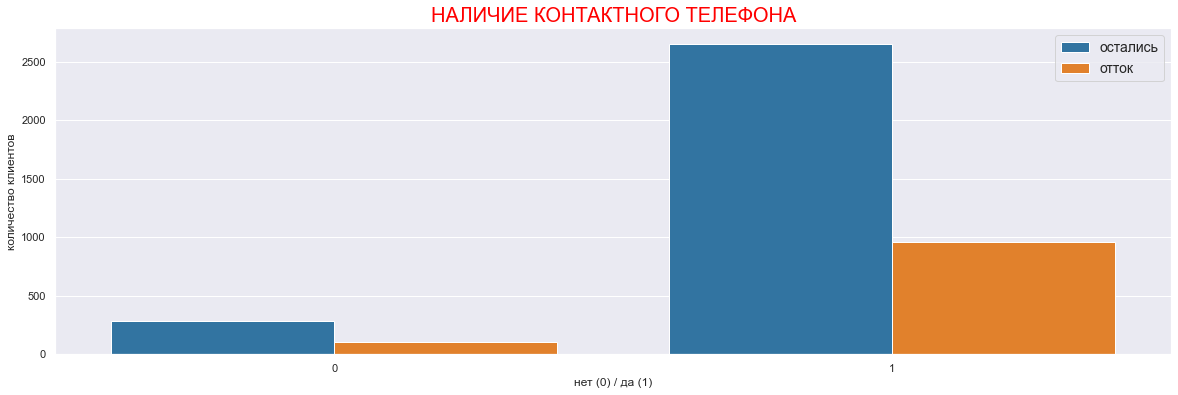

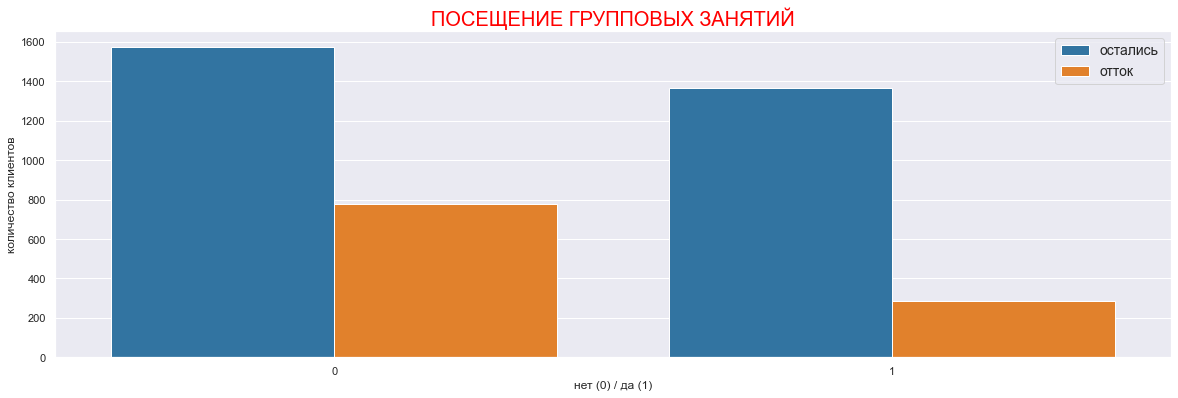

In [10]:
# вывод графиков с помощью функции
def_plot(sns.countplot, df_gym, 'gender',  'churn',
         'ПОЛ КЛИЕНТОВ',
         'пол', legend_labels=['остались', 'отток'])

def_plot(sns.countplot, df_gym, 'near_location',  'churn',
         'БЛИЗОСТЬ К ЦЕНТРУ (проживание или работа рядом)',
         'нет (0) / да (1)', legend_labels=['остались', 'отток'])

def_plot(sns.countplot, df_gym, 'partner',  'churn',
         'СОТРУДНИК КОМПАНИИ ПАРТНЁРА КЛУБА',
         'нет (0) / да (1)', legend_labels=['остались', 'отток'])

def_plot(sns.countplot, df_gym, 'promo_friends',  'churn',
         'ПРИШЛИ ПО АКЦИИ `ПРИВЕДИ ДРУГА`',
         'нет (0) / да (1)', legend_labels=['остались', 'отток'])

def_plot(sns.countplot, df_gym, 'phone',  'churn',
         'НАЛИЧИЕ КОНТАКТНОГО ТЕЛЕФОНА',
         'нет (0) / да (1)', legend_labels=['остались', 'отток'])

def_plot(sns.countplot, df_gym, 'group_visits',  'churn',
         'ПОСЕЩЕНИЕ ГРУППОВЫХ ЗАНЯТИЙ',
         'нет (0) / да (1)', legend_labels=['остались', 'отток'])

Графики подтверждают сделанные ранее наблюдения.

### Матрица корреляций

Посмтроим матрицу корреляций, чтобы посмотреть на взаимосвязь признаков.

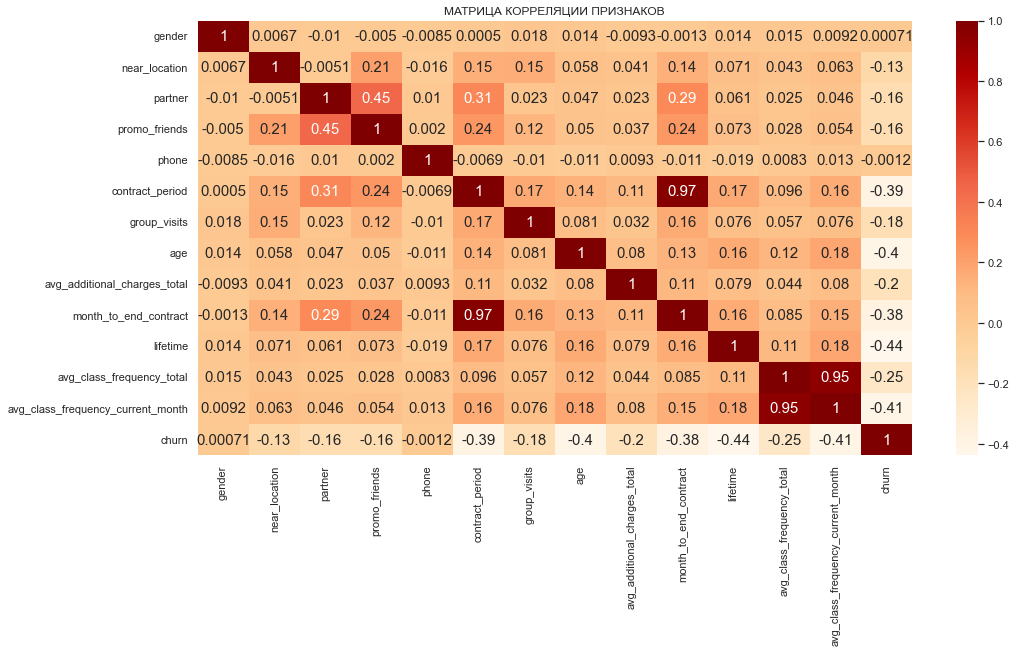

In [11]:
# построение и вывод матрицы корреляции
cm = df_gym.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot=True, cmap="OrRd")
plt.title('МАТРИЦА КОРРЕЛЯЦИИ ПРИЗНАКОВ')
plt.show()

С помощью функции выделим пары столбцов с высокой корреляцией.

In [12]:
# создание фукнции
def def_check_correlation(df):
    
    # описание функции
    """
    Эта функция выводит пары столбцов с высокой корреляцией
    (порог можно задать ниже в теле фунции).
    
    Принимает на вход:
    - df - датафрейм
    
    """
    
    # проверка всех столбцов на корреляцию по заданному порогу
    corr_matrix = df.corr()
    columns = corr_matrix.columns
    high_corr_threshold = 0.7  # порог для определения высокой корреляции

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            if abs(corr_matrix.iloc[i, j]) >= high_corr_threshold:
                col1 = columns[i]
                col2 = columns[j]
                correlation_value = corr_matrix.iloc[i, j]
                correlation_type = "положительная" if correlation_value > 0 else "отрицательная"
                
                print(f"Корреляция Пирсона между столбцами {col1} и {col2} равна {correlation_value:.2f}.")
                print(f"Это значит, что между этими столбцами сильная {correlation_type} корреляция.\n")

In [13]:
# применение функции
def_check_correlation(df_gym)

Корреляция Пирсона между столбцами contract_period и month_to_end_contract равна 0.97.
Это значит, что между этими столбцами сильная положительная корреляция.

Корреляция Пирсона между столбцами avg_class_frequency_total и avg_class_frequency_current_month равна 0.95.
Это значит, что между этими столбцами сильная положительная корреляция.



Корреляция между этими парами столбцов вполне объяснима и закономерна - они связаны изначально.  
В первом случае это два разных аспекта длительности контракта. А во втором - количество посещений за весь период и за последний месяц.  

Заметной корреляции между целевой переменной (фактом оттока) и остальными признаками нет.

<div style="border:solid green 2px; padding: 20px">    
Проанализированы и визуализированы средние значения признаков по группам (группа оттока и группа остающихся).
<br>Несмотря на то, что по многим признакам вполне логичные для групп показатели, заметной корреляции между признаками и целевой переменной не обнаружено.
</div>

## Модель прогнозирования оттока клиентов

### Подготовка данных

Подготовим данные: разобьём на обучающую и валидационную выборки.

In [14]:
# разделение данных на признаки (матрица X) и целевую переменную (y)
X = df_gym.drop(columns=['churn'])
y = df_gym['churn']

# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(f'''Количество наблюдений в обучающей выборке: {X_train.shape[0]}
Количество наблюдений в валидационной выборке: {X_test.shape[0]}''')

Количество наблюдений в обучающей выборке: 3200
Количество наблюдений в валидационной выборке: 800


### Обучение модели на train-выборке

Обучим модель двумя способами:
- логистической регрессией,
- случайным лесом.

Для удобства зададим функцию для вывода метрик моделей.

In [16]:
# создание функции
def def_print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    
    # описание функции
    """
   Эта функция выводит на экран различные метрики для оценки качества модели классификации.
    
    Параметры:
    - y_true: массив истинных значений целевой переменной
    - y_pred: массив предсказанных значений целевой переменной
    - y_proba: массив вероятностей предсказаний
    - title: заголовок (название метрик)
    
    Выводит метрики:
    - Accuracy: доля правильных ответов
    - Precision: точность модели
    - Recall: полнота модели
    - F1-score: среднее гармоническое Precision и Recall
    
    """
    
    # вывод информации
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

Обучим наши модели.

In [17]:
# создание объекта класса StandardScaler для обучающей выборки
scaler = StandardScaler()

# обучение
X_train_st = scaler.fit_transform(X_train)

# стандартизация
X_test_st = scaler.transform(X_test)

In [18]:
# логистическая регрессия
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [19]:
# случайный лес
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [20]:
# вывод метрик моделей
def_print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:'
)

def_print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='\nМетрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83


Сравним обе модели:
- __Accuracy__ (доля правильных ответов алгоритма) - одинаковый результат,
- __Precision__ (точность) - выше у логистической регрессии,
- __Recall__ (полнота)  - выше у логистической регрессии,
- __F1__ (среднее гармоническое) - выше у логистической регрессии.

<div style="border:solid green 2px; padding: 20px">    
В результате сравнения метрик обеих моделей можно сделать вывод, что модель логистической регрессии показала себя лучше.
</div>

## Кластеризация клиентов

### Иерархическая кластеризация

Стандартизируем данные и построим дендрограмму.

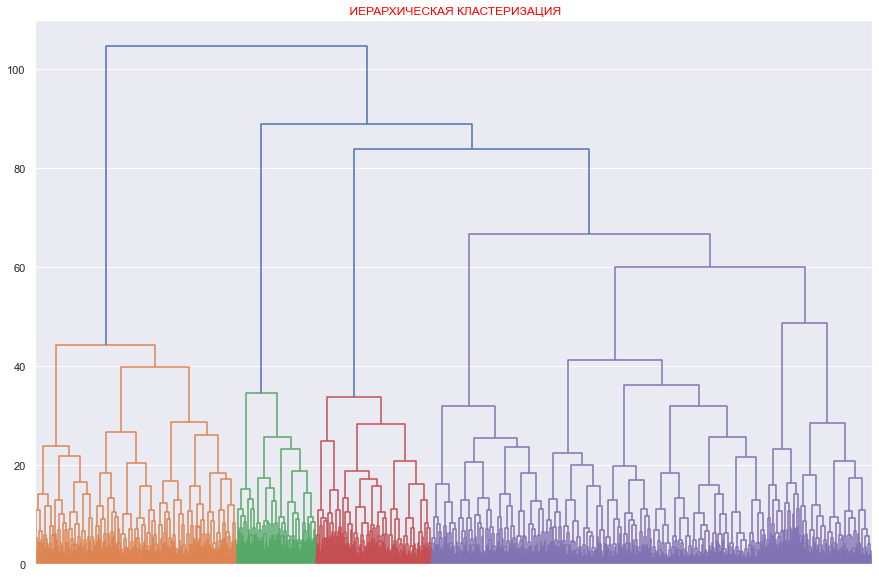

In [21]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method='ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title(' ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ', color='red')
plt.show()

На основании дендрограммы можно выделить 4-6 кластеров. Для дальнейшего исследования возьмём 5 кластеров.

### Прогнозирование кластеров клиентов

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [22]:
# определение параметров
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)

In [23]:
# добавление кластеров в датафрейм
df_gym['cluster'] = labels

In [24]:
df_gym.groupby('cluster').mean().T.style.format('{:.2f}')

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


С помощью функции выведем портреты клиентов по кластерам.

In [25]:
# создание функции
def def_analyze_clusters(df, cluster_column):
    
    # описание функции
    """
   Эта функция выводит на экран информацию о клиентах каждого кластера по всем параметрам таблицы.
    
    Принимает на вход:
    - df - датафрейм
    - cluster_column - название столбца с кластерами
    
    Функция не универсальна и рассчитана на вывод заранее заданных столбцов.
    Если нужно вывести информацию по другим столбцам, необходимо добавить нужные строки в код фукнции.
    Тем не менее, по текущим столбцам можно пропустить через неё любой датафрейм.

    """
    # подсчёт общего количества клиентов
    total_clients = len(df)
    # сортировка кластеров
    unique_clusters = sorted(df[cluster_column].unique())
    
    # определение значений исходных параметров для каждого кластера
    for cluster in unique_clusters:
        cluster_data = df[df[cluster_column] == cluster]
        cluster_size = len(cluster_data)
        cluster_percentage = (cluster_size / total_clients) * 100
        
        churn_rate = cluster_data['churn'].mean() * 100
        contract_duration = (
            cluster_data['contract_period'].value_counts(normalize=True) * 100
        ).astype(int).to_string()
        month_to_end_contract = cluster_data['month_to_end_contract'].mean()
        near_location = cluster_data['near_location'].mean() * 100
        partner = cluster_data['partner'].mean() * 100
        promo_friends = cluster_data['promo_friends'].mean() * 100
        group_visits = cluster_data['group_visits'].mean() * 100
        avg_class_frequency_total = cluster_data['avg_class_frequency_total'].mean()
        avg_class_frequency_current_month = cluster_data['avg_class_frequency_current_month'].mean()
        avg_additional_charges_total = cluster_data['avg_additional_charges_total'].mean()
        lifetime = cluster_data['lifetime'].mean()
        gender_distribution = (
            cluster_data['gender'].value_counts(normalize=True) * 100
        ).astype(int).to_string()
        avg_age = cluster_data['age'].mean()
        phone_usage = cluster_data['phone'].mean() * 100
        
        # вывод информации по каждому кластеру
        print(f"\033[1;31mКЛАСТЕР {cluster}\033[m")
        print(f"\033[1;31m({cluster_size} клиентов - {cluster_percentage:.0f}% от общего количества)\033[m")
        print(f"\033[1m- вероятность оттока: {churn_rate:.0f}%\033[m")
        
        contract_duration_lines = contract_duration.split('\n')
        print("- длительность контракта:")
        for line in contract_duration_lines:
            print(f"\t{line}%")
        
        print(f"- срок до окончания текущего контракта (среднее): {month_to_end_contract:.1f} мес.")
        print(f"- лайфтайм: {lifetime:.1f} мес.")
        print(f"\n- близость проживания или работы: {near_location:.0f}%")
        print(f"- сотрудники компаний-партнёров: {partner:.0f}%")
        print(f"- пришли по акции 'приведи друга': {promo_friends:.0f}%")
        print(f"\n- частота занятий за всё время (в неделю): {avg_class_frequency_total:.1f}")
        print(f"- частота занятий в последний месяц (в неделю): {avg_class_frequency_current_month:.1f}")
        print(f"- посещение групповых занятий: {group_visits:.0f}%")
        print(f"- сумма за дополнительные услуги (среднее): {avg_additional_charges_total:.0f} у.е.")
        
        print(f"\n- возраст (средний): {avg_age:.0f} лет")
        gender_distribution_lines = gender_distribution.split('\n')
        print("- пол:")
        for line in gender_distribution_lines:
            print(f"\t{line}%")
            
        print(f"- наличие телефона в базе: {phone_usage:.0f}%")
        print("\n")

In [26]:
# вывод информации с помощью функции
def_analyze_clusters(df_gym, 'cluster')

КЛАСТЕР 0
(1010 клиентов - 25% от общего количества)
- вероятность оттока: 3%
- длительность контракта:
	12    81%
	6     18%
- срок до окончания текущего контракта (среднее): 10.0 мес.
- лайфтайм: 4.7 мес.

- близость проживания или работы: 96%
- сотрудники компаний-партнёров: 78%
- пришли по акции 'приведи друга': 57%

- частота занятий за всё время (в неделю): 2.0
- частота занятий в последний месяц (в неделю): 2.0
- посещение групповых занятий: 54%
- сумма за дополнительные услуги (среднее): 161 у.е.

- возраст (средний): 30 лет
- пол:
	1    50%
	0    49%
- наличие телефона в базе: 100%


КЛАСТЕР 1
(385 клиентов - 10% от общего количества)
- вероятность оттока: 27%
- длительность контракта:
	1     53%
	12    24%
	6     22%
- срок до окончания текущего контракта (среднее): 4.5 мес.
- лайфтайм: 3.9 мес.

- близость проживания или работы: 86%
- сотрудники компаний-партнёров: 47%
- пришли по акции 'приведи друга': 31%

- частота занятий за всё время (в неделю): 1.8
- частота занятий в 

### Распределение признаков для кластеров

Визуализируем распредления количественных и категориальных признаков по кластерам.

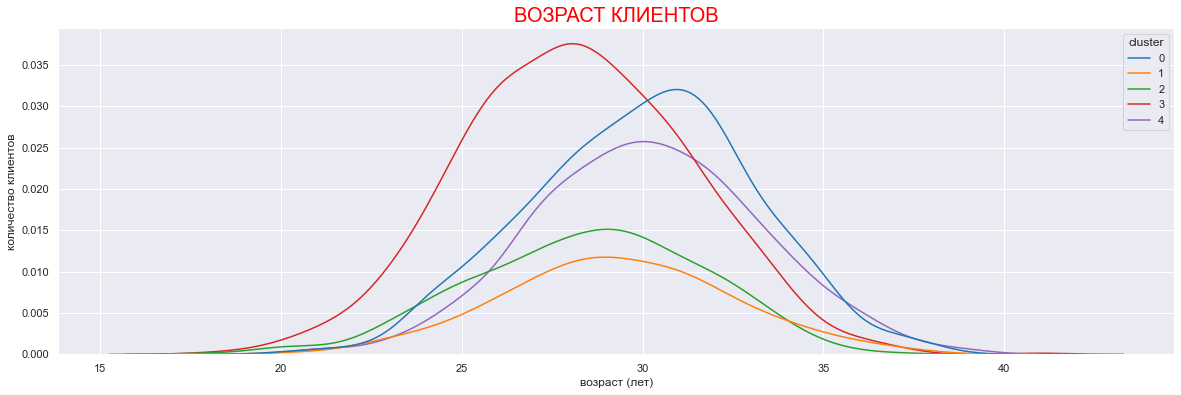

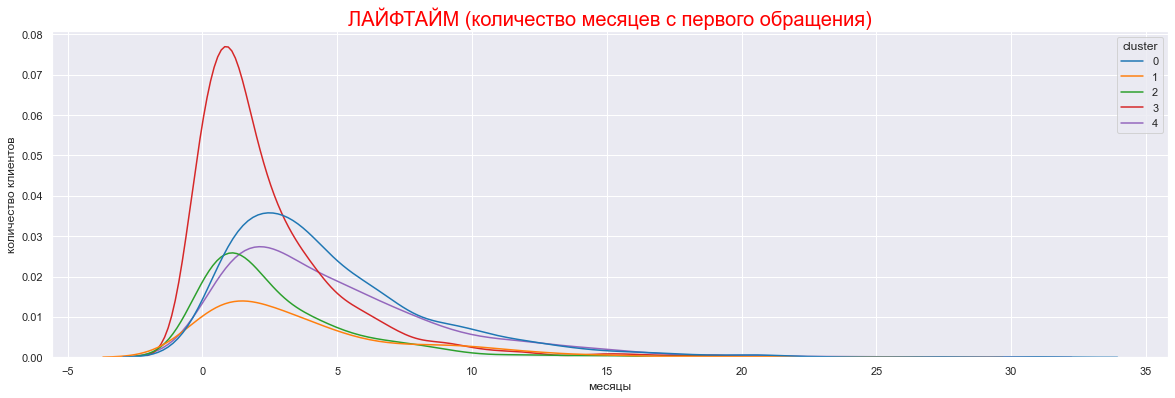

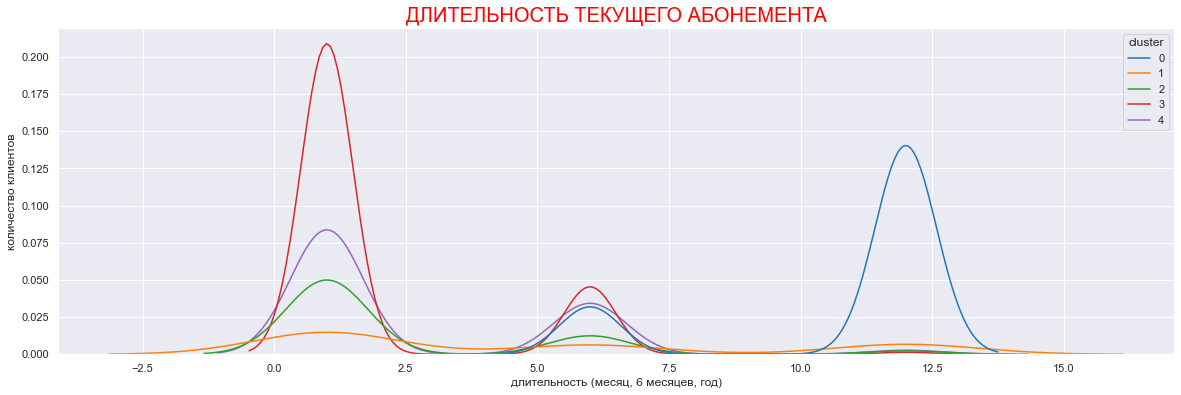

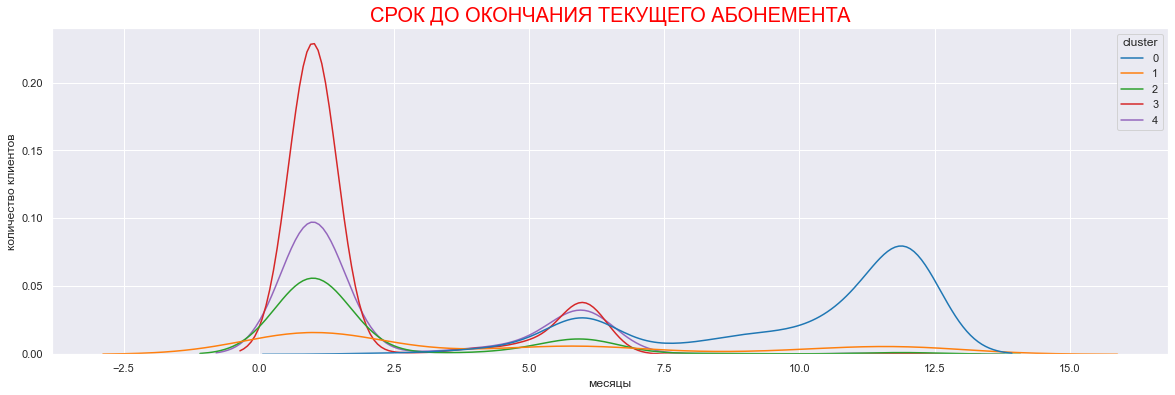

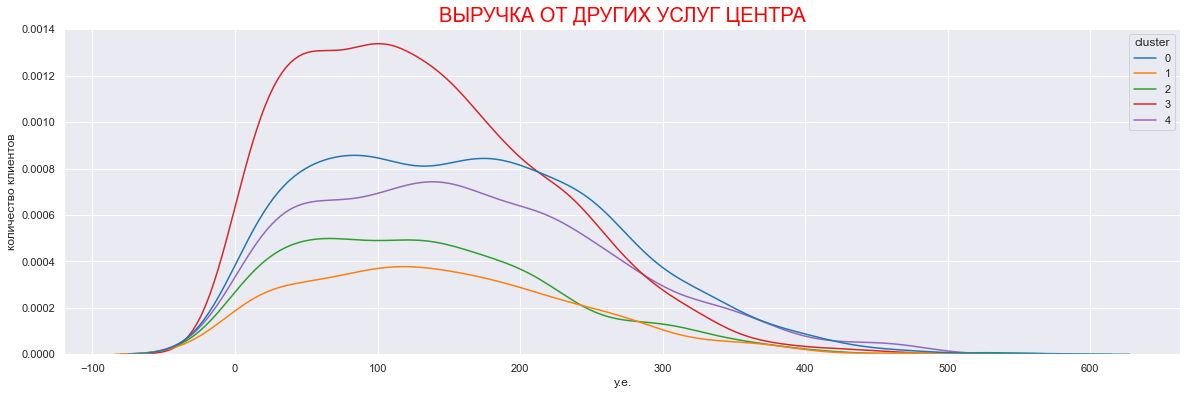

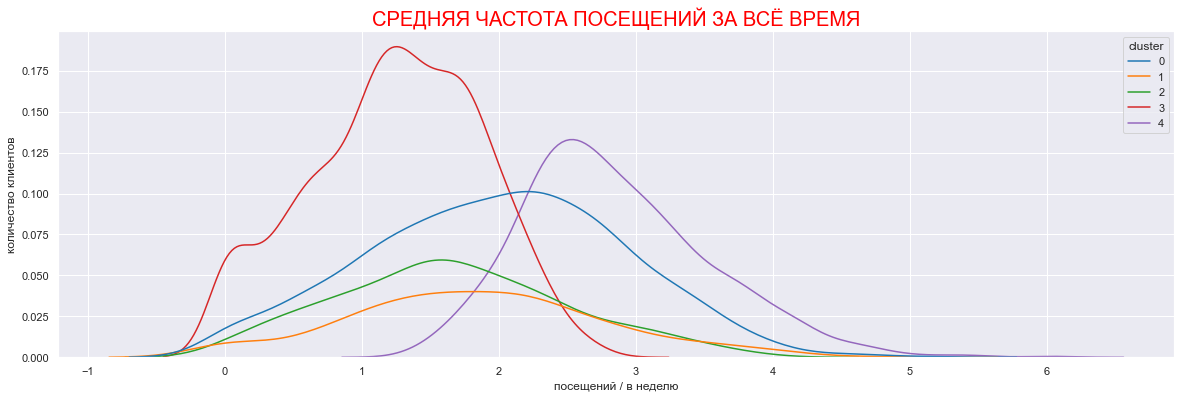

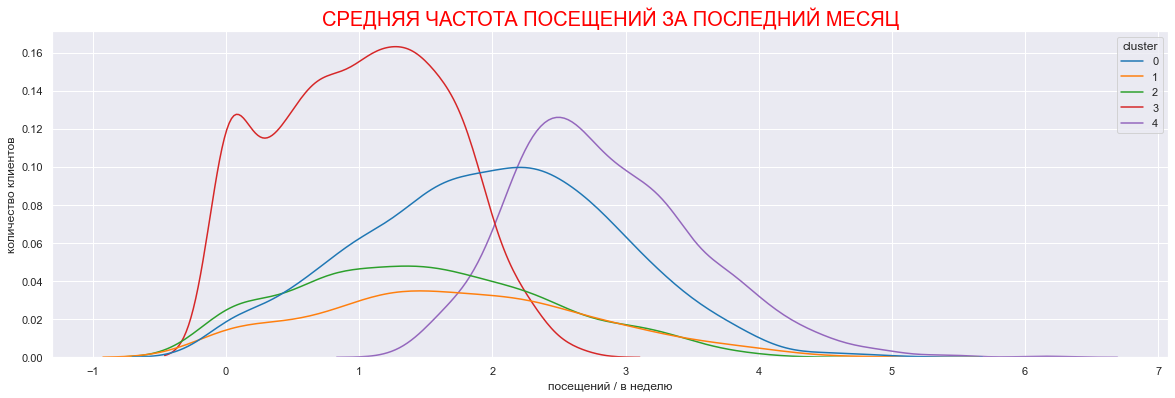

In [27]:
# вывод графиков с помощью функции
def_plot(sns.kdeplot, df_gym, 'age', 'cluster',
         'ВОЗРАСТ КЛИЕНТОВ',
         'возраст (лет)')

def_plot(sns.kdeplot, df_gym, 'lifetime', 'cluster',
         'ЛАЙФТАЙМ (количество месяцев с первого обращения)',
         'месяцы')

def_plot(sns.kdeplot, df_gym, 'contract_period', 'cluster',
         'ДЛИТЕЛЬНОСТЬ ТЕКУЩЕГО АБОНЕМЕНТА',
         'длительность (месяц, 6 месяцев, год)')

def_plot(sns.kdeplot, df_gym, 'month_to_end_contract', 'cluster',
         'СРОК ДО ОКОНЧАНИЯ ТЕКУЩЕГО АБОНЕМЕНТА',
         'месяцы')

def_plot(sns.kdeplot, df_gym, 'avg_additional_charges_total', 'cluster',
         'ВЫРУЧКА ОТ ДРУГИХ УСЛУГ ЦЕНТРА',
         'у.е.')

def_plot(sns.kdeplot, df_gym, 'avg_class_frequency_total', 'cluster',
         'СРЕДНЯЯ ЧАСТОТА ПОСЕЩЕНИЙ ЗА ВСЁ ВРЕМЯ',
         'посещений / в неделю')

def_plot(sns.kdeplot, df_gym, 'avg_class_frequency_current_month', 'cluster',
         'СРЕДНЯЯ ЧАСТОТА ПОСЕЩЕНИЙ ЗА ПОСЛЕДНИЙ МЕСЯЦ',
         'посещений / в неделю')

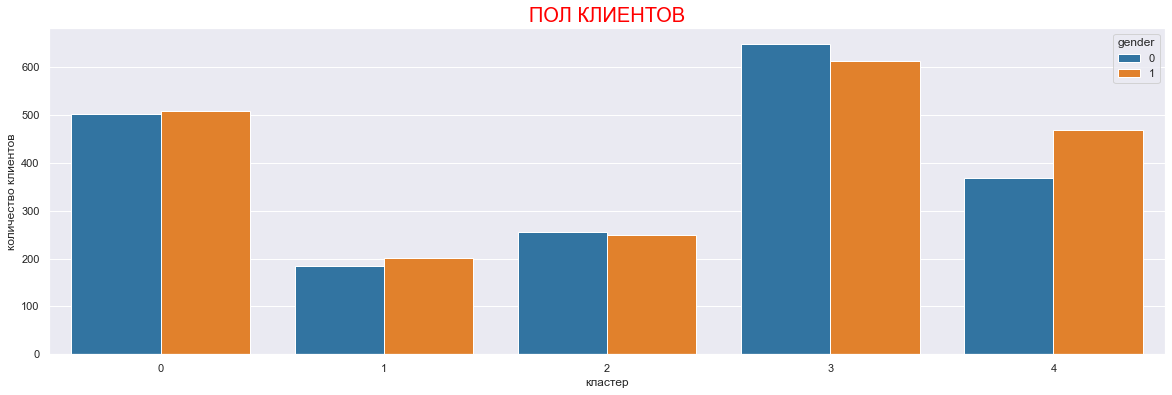

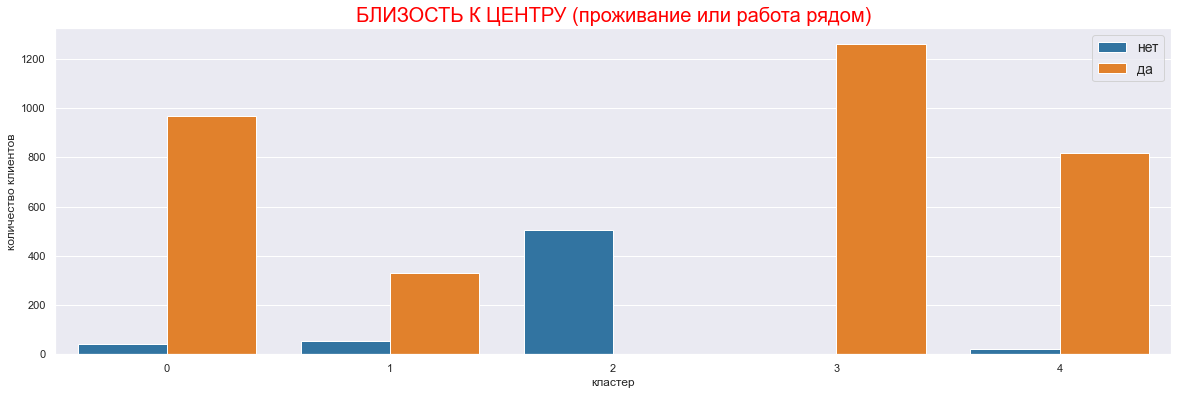

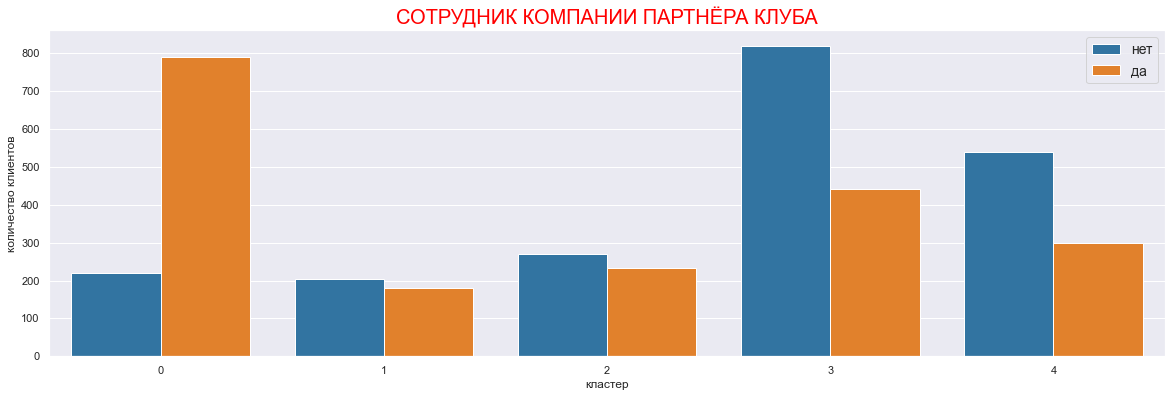

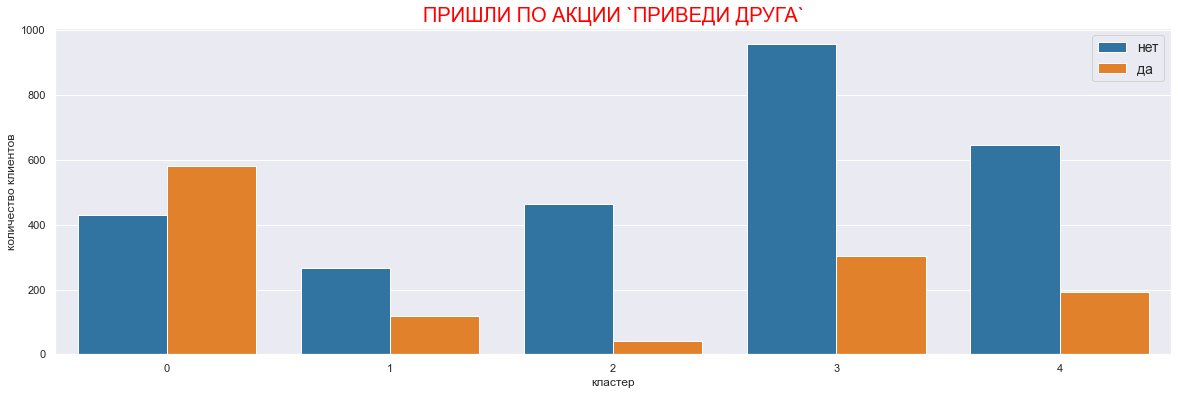

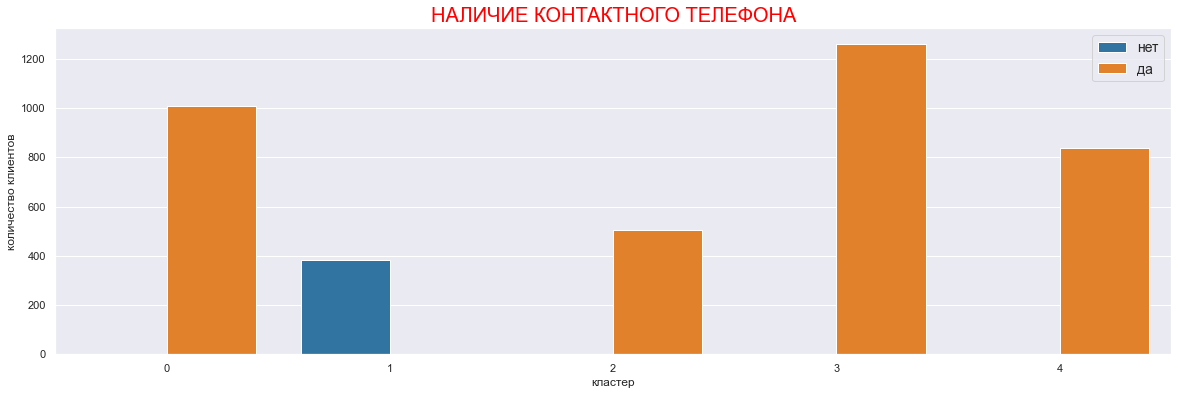

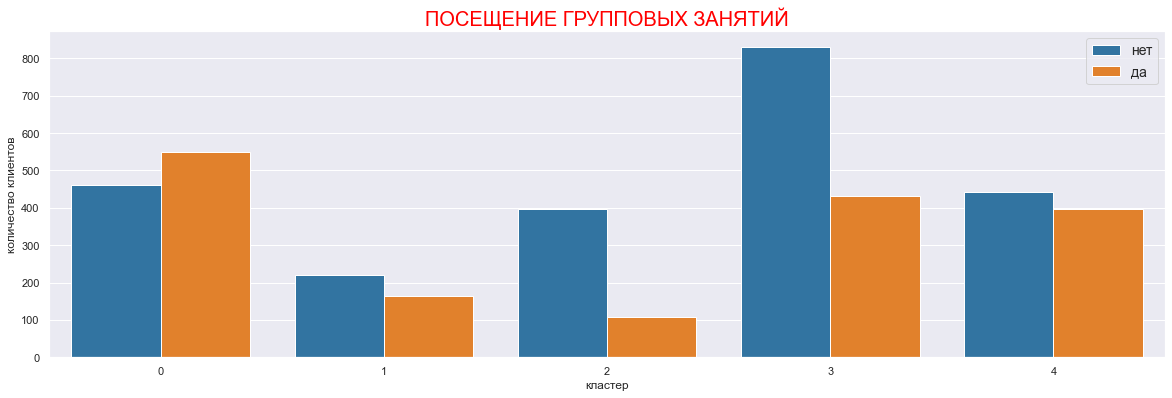

In [28]:
# вывод графиков с помощью функции
def_plot(sns.countplot, df_gym, 'cluster', 'gender',
         'ПОЛ КЛИЕНТОВ',
         'кластер')

def_plot(sns.countplot, df_gym,  'cluster', 'near_location',
         'БЛИЗОСТЬ К ЦЕНТРУ (проживание или работа рядом)',
         'кластер', legend_labels=['нет', 'да'])

def_plot(sns.countplot, df_gym,  'cluster', 'partner',
         'СОТРУДНИК КОМПАНИИ ПАРТНЁРА КЛУБА',
         'кластер', legend_labels=['нет', 'да'])

def_plot(sns.countplot, df_gym,  'cluster', 'promo_friends',
         'ПРИШЛИ ПО АКЦИИ `ПРИВЕДИ ДРУГА`',
         'кластер', legend_labels=['нет', 'да'])

def_plot(sns.countplot, df_gym,  'cluster', 'phone',
         'НАЛИЧИЕ КОНТАКТНОГО ТЕЛЕФОНА',
         'кластер', legend_labels=['нет', 'да'])

def_plot(sns.countplot, df_gym,  'cluster', 'group_visits',
         'ПОСЕЩЕНИЕ ГРУППОВЫХ ЗАНЯТИЙ',
         'кластер', legend_labels=['нет', 'да'])

Можно сделать следующие наблюдения:  
- наиболее преданные клиенты попали в кластеры 0 и 4
- минимальный отток у кластера 0
- кластеры 0 и 4 показывают самые высокие показатели выручки с дополнительных услуг
- клиенты кластеров 0 и 4 чаще участвуют в групповых занятиях
- у клиентов кластеров 0 и 4 более высокий лайфтам
- у клиентов кластера 4 самая высокая посещаемость

- кластеры, показывающие отток клиентов - 1, 2, 3
- худшие показатели у клатера 3 (на графике особо выделяется)

### Доля оттока клиентов для каждого кластера

Выведем отдельно количественное распределение клиентов по кластерам и посчитаем долю оттока.

In [29]:
# создание сводной таблицы
cluster = (
    df_gym
    .query('churn == 1')
    .groupby('cluster')
    .agg({'cluster': 'count'})
    .rename(columns={'cluster': 'отток'})
)

# переименование индекса
cluster = cluster.rename_axis('кластер')

# создание новых столбцов
cluster['всего клиентов'] = df_gym.groupby('cluster').agg({'cluster': 'count'})
cluster['доля'] = (cluster['отток'] / cluster['всего клиентов']).round(2)

# вывод на экран с форматированием
display(cluster.style
           .format({'доля': '{:.0%}'})
           .background_gradient(cmap='YlOrRd', axis=0)
           .set_caption('ДОЛЯ ОТТОКА КЛИЕНТОВ<br>ПО КЛАСТЕРАМ')
           .set_table_styles([{'selector': 'caption', 
                                    'props': [('color', 'coral'), ('font-size', '15px')]
                                   }]))

,отток,всего клиентов,доля
кластер,,,
0,28,1010,3%
1,103,385,27%
2,224,505,44%
3,649,1262,51%
4,57,838,7%


Больше всего клиентов в кластере 3 - там же больше всего отток (51%).  
Наименьший отток во втором по величение кластере 0 (3%).

<div style="border:solid green 2px; padding: 20px">   
С помощью дендрограммы было выделено 5 кластеров клиентов. Кластеры были проанализированы по всем представленным в датафрейме признакам.
<br>По оттоку кластеры распределились в следующем порядке:
<br>- кластер 3 - наибольший отток (51%)
<br>- кластер 2 (44%)
<br>- кластер 1 (27%)
<br>- кластер 4 (7%)
<br>- кластер 0 - наименьший отток (3%)
</div>

## Выводы и базовые рекомендации по работе с клиентами

 <div style="border: solid green 4px; border-style: double; padding: 20px;">
    <b>ВЫВОДЫ ПО ПРОЕКТУ</b>
    
В рамках данного исследования был проведён анализ данных о клиентах сети фитнес-центров.
<br>В нашем распоряжении были данные о клиентах сети с их признаками и с целевой переменной - фактом ухода клиента в отток. Всего было 4000 наблюдений и 13 признаков. Исходные данные были хорошего качества, без пропусков и без дубликатов.

В рамках EDA мы рассмотрели средние значения признаков по группам, а также построили графики их распределений.
Проверили на корреляцию все признаки и выявили, что значимой зависимости между признаками и целевой переменной нет.

Далее мы обучили и протестировали две модели прогнозирования ухода клиентов в отток: логистическую регрессию и случайный лес. В итоге мы остановились на логистической регрессии, которая показала себя лучше.

<b>КЛАСТЕРЫ КЛИЕНТОВ</b><br>
Мы стандартизировали данные и построили дендограмму, чтобы определить, на какое количнство кластеров лучше разделить клиентов. Было принято решение разделить клиентов на 5 кластеров, используя алгоритм KMeans.
    
В итоге получились следующие кластеры:<br>
<b>Кластер 0</b>
<br>- Размер кластера: 1010 клиентов (25% от общего количества).
<br>- Наиболее лояльные клиенты, вероятность ухода в отток составляет около 3%.
<br>- Покупают абонемент в основном на 12 месяцев (81%). Почти всегда живут или работают рядом (96%). Очень часто являются сотрудниками компаний-партнёров фитнес-центра (78%), поэтому покупают абонемент по скидке. Многие приходят по акции "приведи друга" (57%). Чаще других посещают групповые тренировки (54%).
    
<b>Кластер 1</b>
<br>- Размер кластера: 385 клиентов (10% от общего количества).
<br>- Вероятность ухода в отток составляет 27%.
<br>- Чаще покупают абонемент на 1 месяц (53%). В основном живут близко в фитнес-центру (86%). Чаще приходят самостоятельно, а не по акции "приведи друга" (69%). У фитнес-центра нет наличия контактного телефона этих клиентов.
    
<b>Кластер 2</b>
<br>- Размер кластера: 505 клиентов (13% от общего количества).
<br>- Высокая вероятность ухода в отток: 44%.
<br>- Чаще имеют абонемент на месяц (77%). Очень мало кто из этой группы приходит по акции "приведи друга" (всего 8%). Все они не живут и не работают близко от фитнес-центра. Реже всех посещают групповые занятия (22%).
    
<b>Кластер 3</b>
<br>- Размер кластера: 1262 клиента (32% от общего количества).
<br>- Наивысшая вероятность ухода в отток: 51%.
<br>- Чаще всего абонемент на месяц (81%), иногда на полгода и никогда на 12 месяцев. Самый низкий лайфтайм (2.4 месяца). Приносят самую малую среднюю выручку за дополнительные услуги (132 у.е.). Реже всех других клиентов посещают занятия (примерно 1 раз в неделю). Всегда живут или работают рядом с фитнес-центром.
    
<b>Кластер 4</b>
<br>- размер кластера: 838 клиентов (21% от общего количества).
<br>- Одни из самых лояльных клиентов, с вероятностью ухода в отток 7%.
<br>- Чаще всего абонемент на месяц (69%), или имеют абонемент на полгода (28%), крайне редко - абонемент на 12 месяцев (всего 2%). Самый высокий лайфтайм (4.9 месяцев). В среднем приносят самую большую выручку за дополнительные услуги (162 у.е.), а также значительно чаще других посещают занятия (почти 3 раза в неделю). Почти всегда живут или работают рядом (98%). Редко приходят по акции "приведи друга" (23%) и нечасто работают в компаниях-партнёрах фитнес-центра (36%).

    
<b>РЕКОМЕНДАЦИИ</b><br>
1. Для клиентов из кластера 0 (низкий отток, долгосрочные абонементы, частые посещения):
   - Специально для этой группы клиентов можно разработать программы лояльности или бонусные предложения за продление абонемента на следующий период.
   - Можно предложить им дополнительные привилегии или услуги, чтобы стимулировать их активность и участие в жизни фитнес-центра.

2. Для клиентов из кластера 1 (средний отток, краткосрочные абонементы, умеренная частота посещения):
   - Хорошо бы изучить причины оттока в этой группе и подумать, что может помочь удержанию клиентов, например, предложить клиентам этой группы персонализированные программы тренировок или консультации с тренером.
   - Можно провести опрос среди них, чтобы понять, что можно улучшить или изменить, чтобы удовлетворить потребности этой группы клиентов.

3. Для клиентов из кластера 2 (высокий отток, краткосрочные абонементы, умеренная частота посещения):
   - Клиентам этой группы можно предложить специальных программы или акции на продление абонемента после окончания текущего периода.
   - Предложить им возможность бесплатного пробного занятия или консультации, чтобы продемонстрировать ценность долгосрочного членства и компенсировать дальность от места проживания и работы.

4. Для клиентов из кластера 3 (высокий отток, краткосрочные абонементы, очень редкие посещения):
   - Предложить им индивидуальные программы тренировок или планы питания, чтобы удержать их в центре.
   - Возможно провести специальные мероприятия или конкурсы / акции именно для этой группы клиентов, чтобы повысить частоту посещения центра.

5. Для клиентов из кластера 4 (низкий отток, краткосрочные абонементы абонементы, очень частые посещения):
   - Можно подумать над внедрением дополнительных услуг или тренировок, которые могут заинтересовать данную группу клиентов и поддерживать их мотивацию.
   - Разработать программы лояльности или бонусные системы для поощрения постоянных посетителей.
   - Предлагать по акции более длительные абонементы.

</div>